# Hennepin County SNAP Program Raw Code  
### - Clustering  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',None)

In [2]:
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data')
total_pop=pd.read_excel('total_data.xlsx',sheet_name='population2018,2019')
total_pvt=pd.read_excel('total_data.xlsx',sheet_name='poverty2018,2019')
summary_0=pd.read_excel('total_data.xlsx',sheet_name='Summary2016-2019',parse_dates=[0])
poverty=pd.read_excel('total_data.xlsx',sheet_name='track_poverty2018')
population=pd.read_excel('total_data.xlsx',sheet_name='track_pop2018')
summary=summary_0[summary_0['elig_month']=='2018-12-01']
county_pvt=pd.read_csv('Poverty_percentage_count_by_tract.csv')
additional_data=pd.read_csv('Clustering_Var.csv')
poverty_2=poverty[poverty['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum().reset_index()
poverty_2['GEOID']=poverty_2['GEOID'].astype(str)
county_pvt['GEOID']=county_pvt['GEOID'].astype(str)
county_pvt=county_pvt.merge(poverty_2,on='GEOID',how='left')[['GEOID','50%','Below_Poverty_Count','125%','150%','185%']]
county_pvt[county_pvt['Below_Poverty_Count']<county_pvt['50%']].shape[0]/county_pvt.shape[0]
pop=population.pivot_table(columns='Race_Ethnicity',index='GEOID',values='Estimates').reset_index()
pop['GEOID']=pop['GEOID'].astype(str)
additional_data['id']=additional_data['id'].astype(str)
part=pd.read_csv(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data\data1203\avg_138\avg_ParticipationRate_2018.csv')

## 1. Data Preprocessing

In [12]:
df=county_pvt.merge(pop,on='GEOID')
df=additional_data.merge(df,left_on='id',right_on='GEOID')
df['GEOID']=df['GEOID'].astype('int64')
df=pd.merge(part[['GEOID','ParticipationRate']],df,on='GEOID',how='left').fillna(0)
df=county_pvt.merge(pop,on='GEOID')
df=additional_data.merge(df,left_on='id',right_on='GEOID')
df['GEOID']=df['GEOID'].astype('int64')
df=pd.merge(part[['GEOID','ParticipationRate']],df,on='GEOID',how='left').fillna(0)
df.to_csv('PredictingData_2.csv')
df_ori=df.copy()
col_list=(additional_data.columns.to_list()+['American Indian and Alaska Native Alone','Asian Alone','Black or African American Alone',
                                  'Hispanic or Latino','White Alone, Not Hispanic or Latino','50%','Below_Poverty_Count',
                                  '125%','150%','185%'])
col_list.remove('Male_pct')
col_list.remove('id')
for i in col_list:
    df[i+'_pct']=df[i]/df['Total Population']
df=df[['GEOID','ParticipationRate','White Alone, Not Hispanic or Latino_pct',
       'Black or African American Alone_pct','Employed!!Female_pct','35 to 64 years_pct',
       'Worked part-time or part-year in the past 12 months_pct','Under 5 years_pct',
       'Less than high school graduate_pct','Asian Alone_pct',"Some college, associate's degree_pct"]]
df.head()

,GEOID,ParticipationRate,"White Alone, Not Hispanic or Latino_pct",Black or African American Alone_pct,Employed!!Female_pct,35 to 64 years_pct,Worked part-time or part-year in the past 12 months_pct,Under 5 years_pct,Less than high school graduate_pct,Asian Alone_pct,"Some college, associate's degree_pct"
0,27053025906,1.351672,0.702969,0.024290,0.316399,0.425464,0.206541,0.059533,0.022226,0.066042,0.241626
1,27053003200,1.301561,0.238943,0.587918,0.277238,0.318770,0.182309,0.045307,0.051780,0.030744,0.206041
2,27053026814,1.219510,0.343431,0.279784,0.287649,0.403729,0.178998,0.044713,0.091465,0.201573,0.275269
3,27053111500,1.216910,0.858793,0.045113,0.293416,0.443792,0.212360,0.080139,0.024390,0.013754,0.142857
4,27053100700,1.172122,0.418426,0.392834,0.316059,0.412988,0.171465,0.046385,0.063980,0.075496,0.230006


## 2.Normalize Data

In [8]:
scaler=MinMaxScaler()
df_sca=scaler.fit_transform(df.iloc[:,2:])
df_sca.shape

(299, 9)

## 3.K-Means Clustering

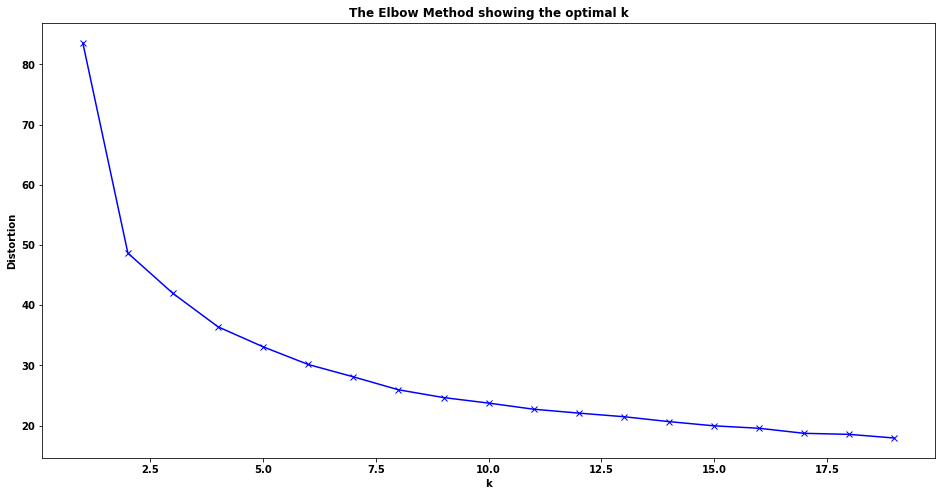

In [18]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_sca)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df_sca)
df['KMeans_cluster_result']=kmeanModel.labels_
Kmeans_result=kmeanModel.labels_
kmean=df.groupby('KMeans_cluster_result').mean()
kmean.to_csv('KMeans_cluster_result.csv')
print(kmeanModel.inertia_)

33.13115894231241


## 4.Hierarchical Clustering

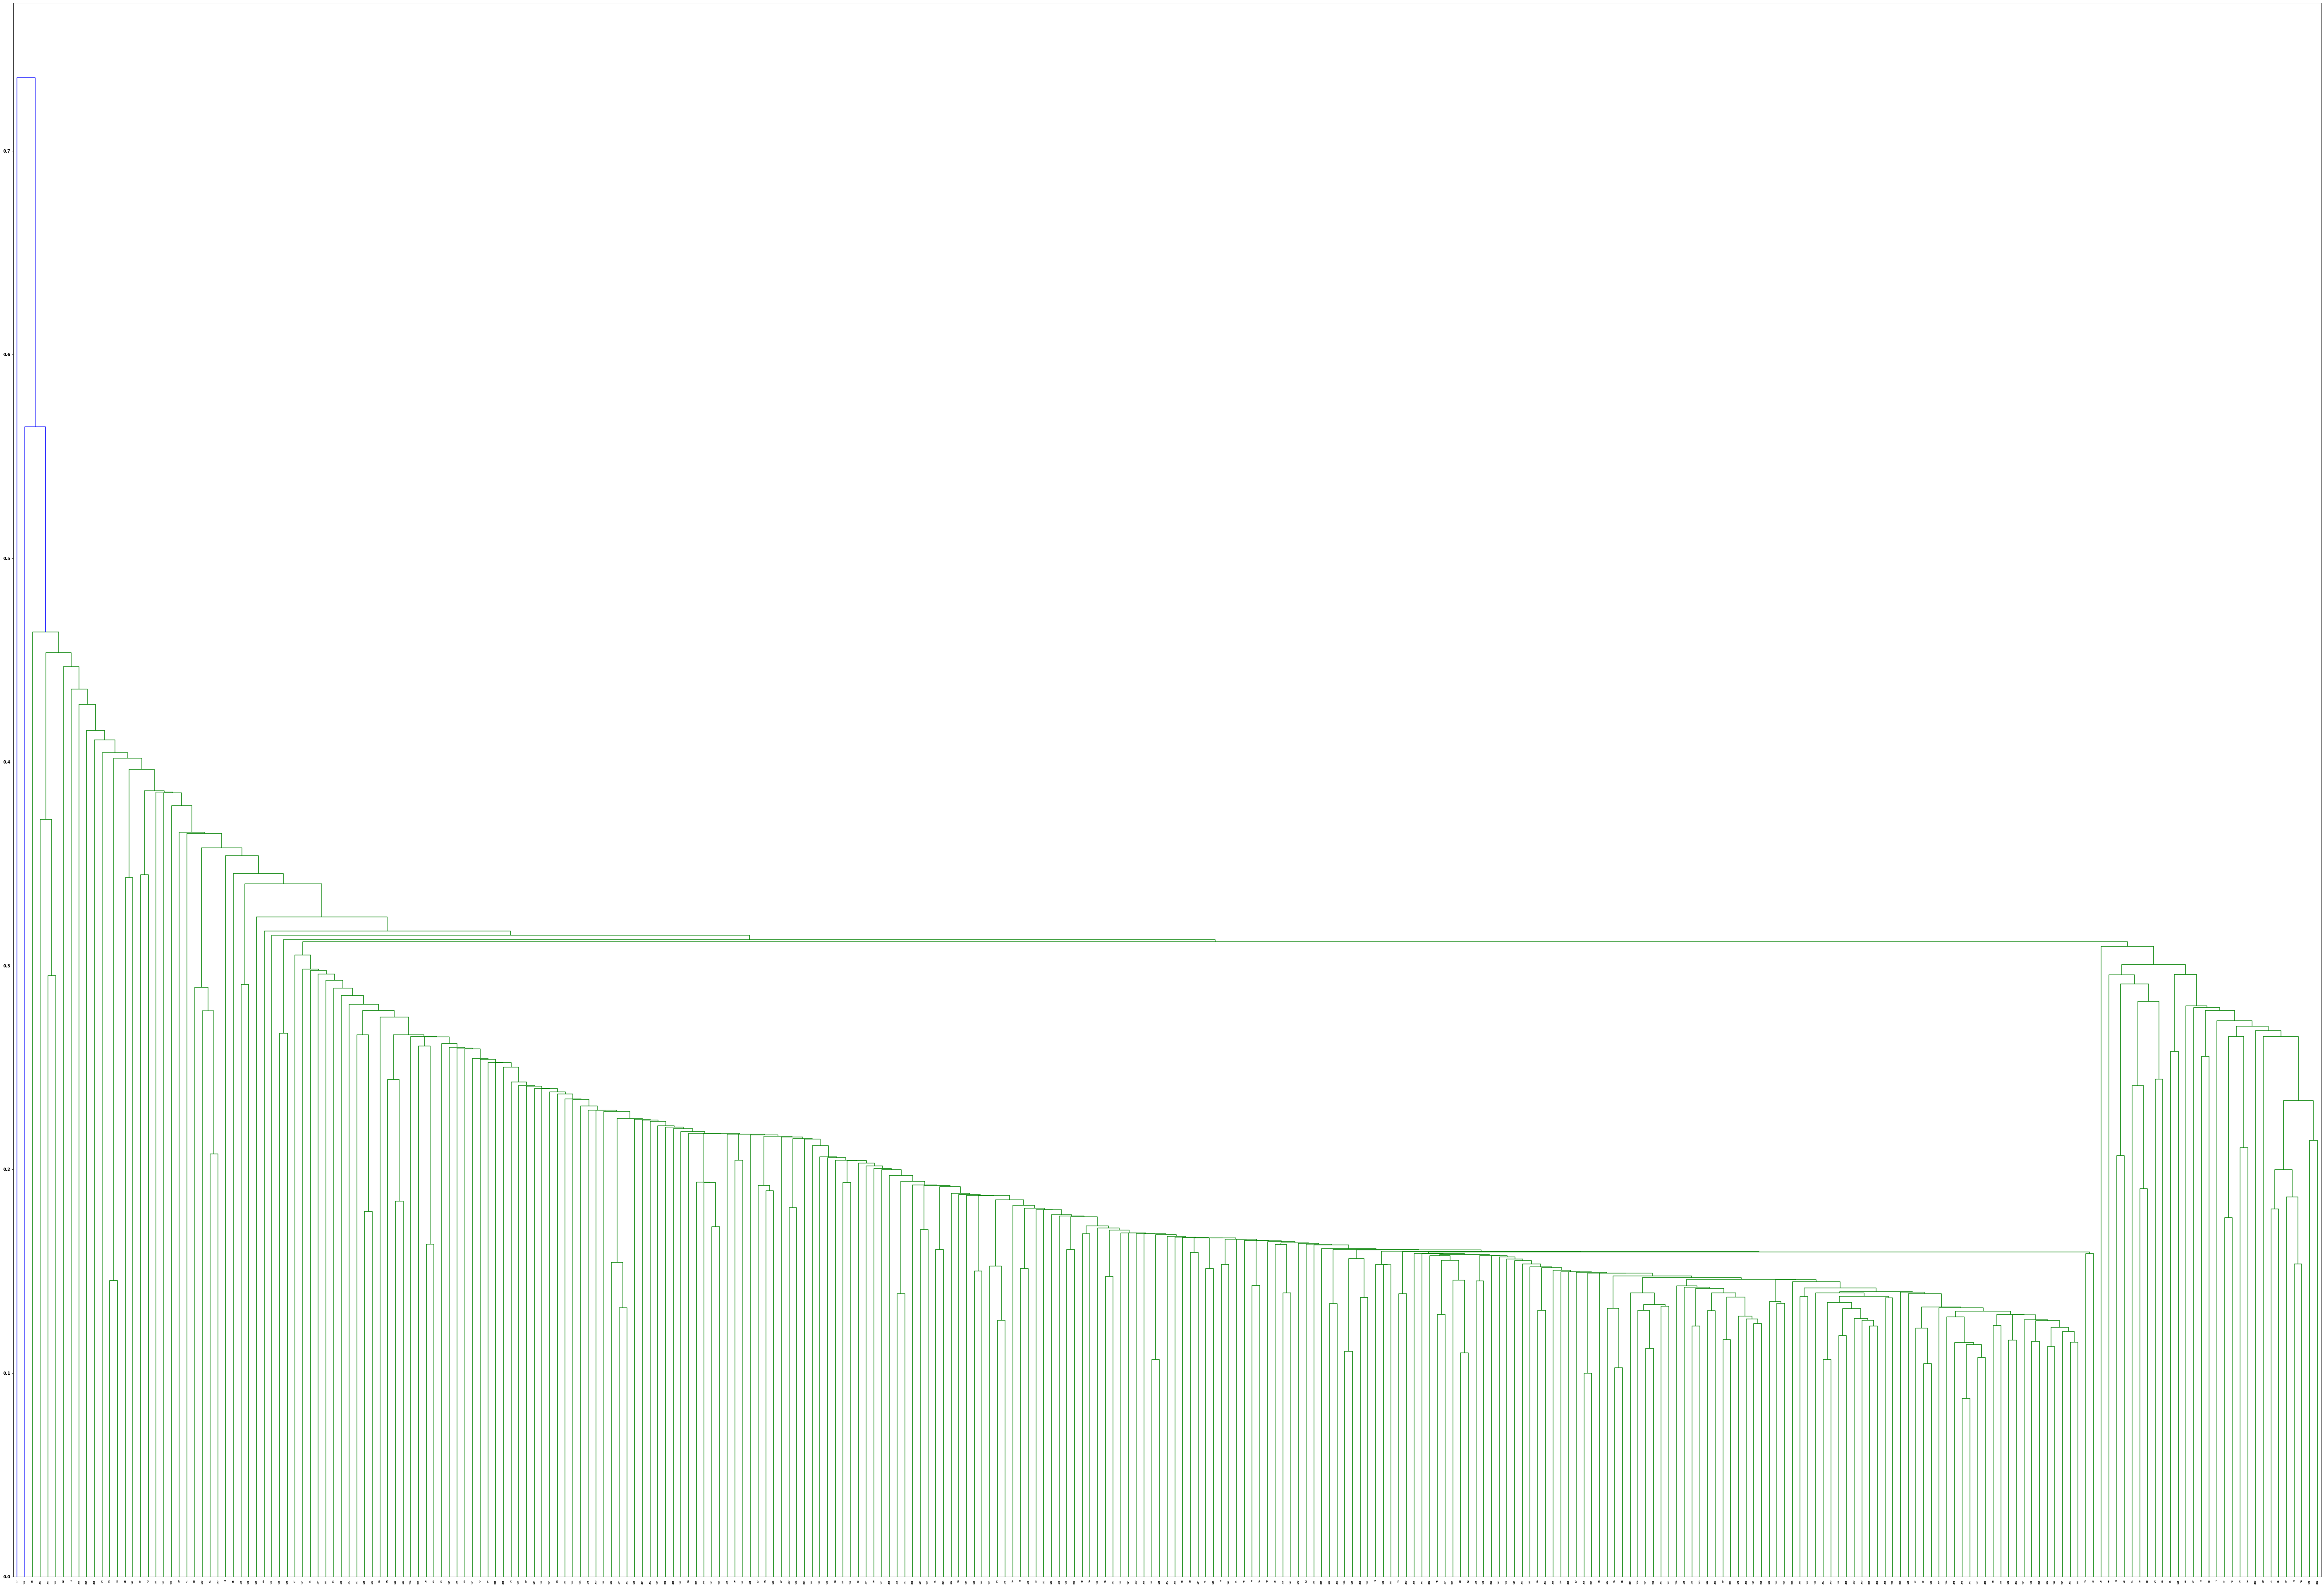

In [13]:
linked = linkage(df_sca, 'single')
labelList = range(len(df))
plt.figure(figsize=(100, 70))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [14]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
result=cluster.fit_predict(df_sca)
Hierarchical_cluster_result_4=result
df['Hierarchical_cluster_result']=result
df.head()

,GEOID,ParticipationRate,"White Alone, Not Hispanic or Latino_pct",Black or African American Alone_pct,Employed!!Female_pct,35 to 64 years_pct,Worked part-time or part-year in the past 12 months_pct,Under 5 years_pct,Less than high school graduate_pct,Asian Alone_pct,"Some college, associate's degree_pct",Hierarchical_cluster_result
0,27053025906,1.351672,0.702969,0.024290,0.316399,0.425464,0.206541,0.059533,0.022226,0.066042,0.241626,0
1,27053003200,1.301561,0.238943,0.587918,0.277238,0.318770,0.182309,0.045307,0.051780,0.030744,0.206041,1
2,27053026814,1.219510,0.343431,0.279784,0.287649,0.403729,0.178998,0.044713,0.091465,0.201573,0.275269,3
3,27053111500,1.216910,0.858793,0.045113,0.293416,0.443792,0.212360,0.080139,0.024390,0.013754,0.142857,0
4,27053100700,1.172122,0.418426,0.392834,0.316059,0.412988,0.171465,0.046385,0.063980,0.075496,0.230006,2


In [21]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
result=cluster.fit_predict(df_sca)
Hierarchical_cluster_result_5=result
df['Hierarchical_cluster_result']=result
hier=df.groupby('Hierarchical_cluster_result').mean()
hier.to_csv('Hierarchical_cluster_result.csv')
df.head()

,GEOID,ParticipationRate,"White Alone, Not Hispanic or Latino_pct",Black or African American Alone_pct,Employed!!Female_pct,35 to 64 years_pct,Worked part-time or part-year in the past 12 months_pct,Under 5 years_pct,Less than high school graduate_pct,Asian Alone_pct,"Some college, associate's degree_pct",Hierarchical_cluster_result,KMeans_cluster_result
0,27053025906,1.351672,0.702969,0.024290,0.316399,0.425464,0.206541,0.059533,0.022226,0.066042,0.241626,4,1
1,27053003200,1.301561,0.238943,0.587918,0.277238,0.318770,0.182309,0.045307,0.051780,0.030744,0.206041,0,4
2,27053026814,1.219510,0.343431,0.279784,0.287649,0.403729,0.178998,0.044713,0.091465,0.201573,0.275269,3,0
3,27053111500,1.216910,0.858793,0.045113,0.293416,0.443792,0.212360,0.080139,0.024390,0.013754,0.142857,4,3
4,27053100700,1.172122,0.418426,0.392834,0.316059,0.412988,0.171465,0.046385,0.063980,0.075496,0.230006,2,2


## 5.Group Characteristic Visualization

In [24]:
df_ori['Hierarchical_cluster_result']=Hierarchical_cluster_result_5
#df_ori['Hierarchical_cluster_result']=Kmeans_result
df_ori_2=pd.merge(df_ori,part,on='GEOID',how='left')
columns=['GEOID','138%','TotalPopulation','Hierarchical_cluster_result','people','White Alone, Not Hispanic or Latino',
       'Black or African American Alone','Employed!!Female','35 to 64 years',
       'Worked part-time or part-year in the past 12 months','Under 5 years',
       'Less than high school graduate','Asian Alone',"Some college, associate's degree"]
df_ori_3=df_ori_2[columns]
df_ori_3.groupby('Hierarchical_cluster_result').sum()
pct_col=['White Alone, Not Hispanic or Latino',
       'Black or African American Alone','Employed!!Female','35 to 64 years',
       'Worked part-time or part-year in the past 12 months','Under 5 years',
       'Less than high school graduate','Asian Alone',"Some college, associate's degree"]
#for i in pct_col:
#    df_ori_3[i+'_pct']=df_ori_3[i]/df_ori_3['TotalPopulation']
df_gp=df_ori_3.groupby('Hierarchical_cluster_result').sum()
df_gp['ParticipationRate']=df_gp['people']/df_gp['138%']
df_gp_2=df_gp.copy()
#df_gp_2.to_csv('138_Hierarchical_cluster_result.csv')
for i in pct_col:
    df_gp_2[i+'_pct']=df_gp_2[i]/df_gp_2['TotalPopulation']
df_gp_2

,GEOID,138%,TotalPopulation,people,"White Alone, Not Hispanic or Latino",Black or African American Alone,Employed!!Female,35 to 64 years,Worked part-time or part-year in the past 12 months,Under 5 years,Less than high school graduate,Asian Alone,"Some college, associate's degree",ParticipationRate,"White Alone, Not Hispanic or Latino_pct",Black or African American Alone_pct,Employed!!Female_pct,35 to 64 years_pct,Worked part-time or part-year in the past 12 months_pct,Under 5 years_pct,Less than high school graduate_pct,Asian Alone_pct,"Some college, associate's degree_pct"
Hierarchical_cluster_result,,,,,,,,,,,,,,,,,,,,,,,
0,1190334709771,61008.199339,156949,28963.0,43272,63372,35146,49151,34807,14434,21358,14125,26372,0.474739,0.275707,0.403774,0.223933,0.313165,0.221773,0.091966,0.136082,0.089997,0.168029
1,595167739708,23419.549022,90629,2780.0,67245,6362,28381,21686,28426,2726,2420,8368,12072,0.118704,0.741981,0.070198,0.313156,0.239283,0.313652,0.030079,0.026702,0.092332,0.133202
2,1650236817792,46771.467276,228525,19224.0,142522,43941,63353,84439,51422,13499,13527,9955,49828,0.411020,0.623660,0.192281,0.277226,0.369496,0.225017,0.059070,0.059193,0.043562,0.218042
3,541060518758,14698.766059,104564,7580.0,48569,20587,25853,40219,17805,8139,6589,22676,20571,0.515690,0.464491,0.196884,0.247246,0.384635,0.170278,0.077837,0.063014,0.216862,0.196731
4,4112061877894,48599.929169,654811,14026.0,552886,26968,176979,282443,131811,40387,12707,32412,122595,0.288601,0.844344,0.041184,0.270275,0.431335,0.201296,0.061677,0.019406,0.049498,0.187222


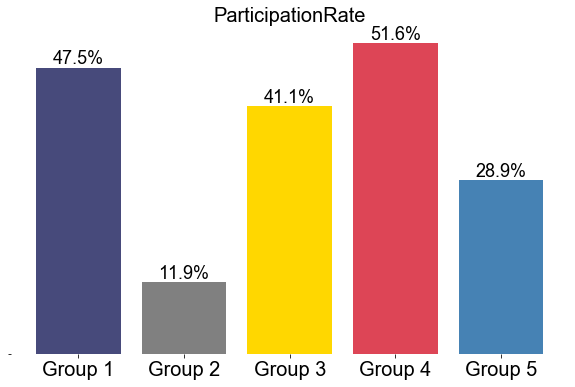

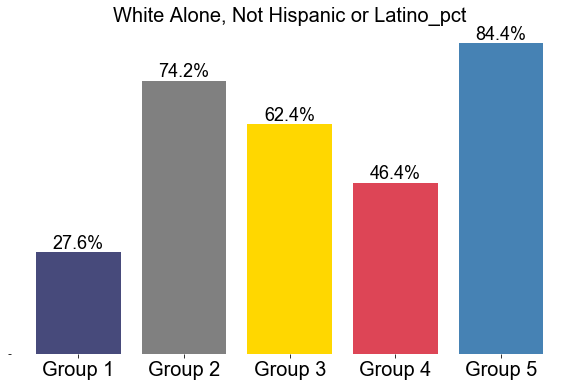

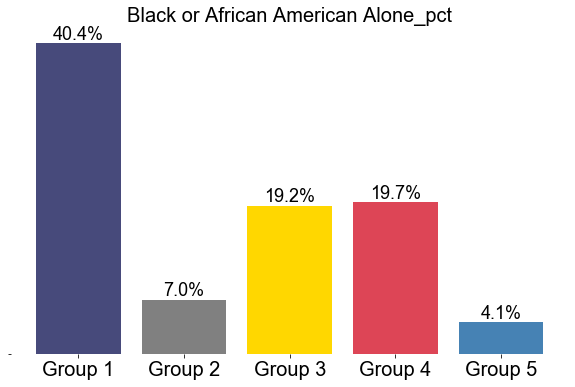

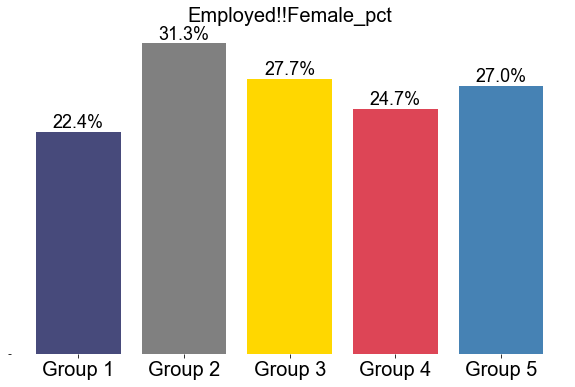

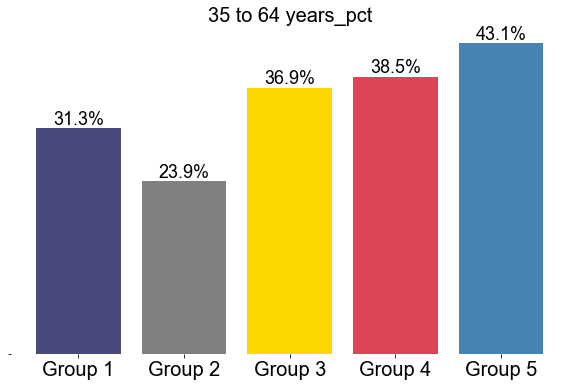

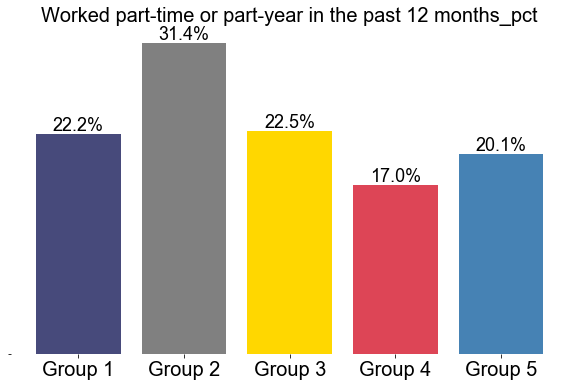

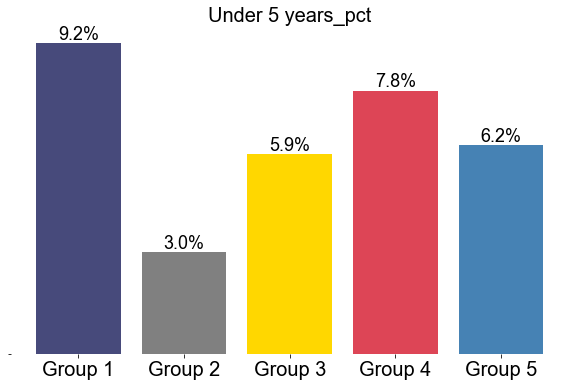

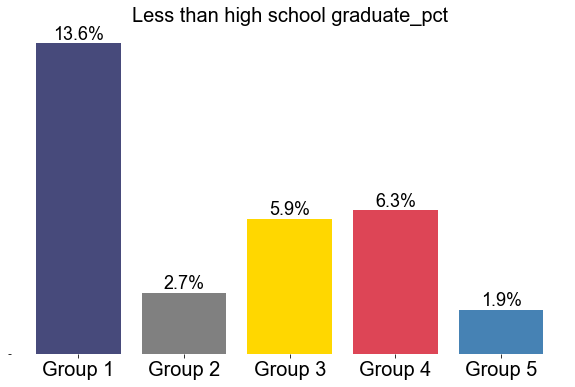

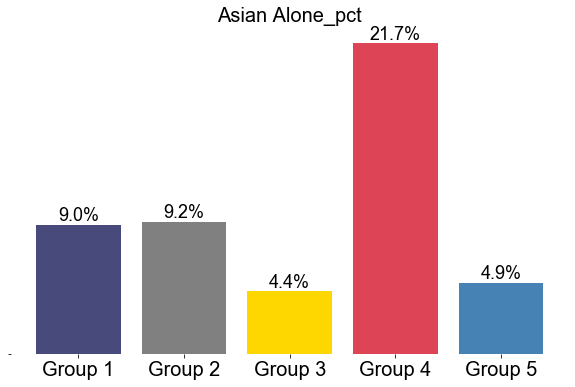

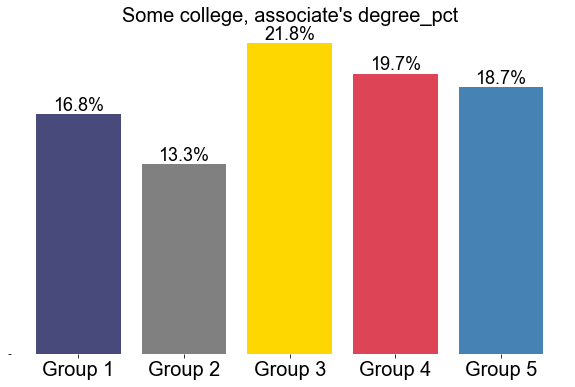

In [26]:
for i in list(df_gp_2.columns[-10:]):
    plt.rcParams['font.sans-serif']=['Arial']
    os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data\pic')
    fig,ax=plt.subplots(figsize=[10,6])
    col=['Group 1','Group 2','Group 3','Group 4','Group 5']
    index=range(len(col))
    values=df_gp_2[i]
    plt.bar(index,values,color=['#474A7B','gray','gold','#DD4556','steelblue'])
    plt.xticks(index,col,fontsize=20)
    plt.yticks([0],'')
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['left'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(0)
    plt.title(i,fontsize=20)
    for i,j in zip(index,values):
        plt.text(i,j,str(round(j*100,1))+'%',ha='center',va='bottom',fontsize=18)
    plt.savefig('cluster_group.png',transparent=True,bbox_inches='tight')
    plt.show()

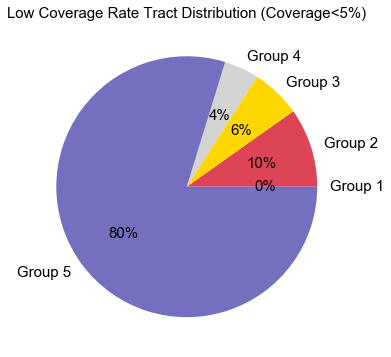

In [31]:
sums=0.05351170568561873+0.033444816053511704+0.023411371237458192+0.43478260869565216
from matplotlib.font_manager import FontProperties
font_path=r'C:\Users\sherr\Tools' #笔记本
font_1=FontProperties(fname=font_path+'\\'+'Arial.ttf',size=15)
plt.rcParams['font.sans-serif']=['Arial']
fig,ax=plt.subplots(figsize=[10,6])
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data\pic')
plt.pie([0/sums,0.05351170568561873/sums,0.033444816053511704/sums,0.023411371237458192/sums,0.43478260869565216/sums],
       labels=['Group 1','Group 2','Group 3','Group 4','Group 5'],autopct='%1.0f%%',colors=['#474A7B','#DD4556','gold','lightgray','#7470BF'],
       textprops={'fontproperties':font_1,'color':'black'})
plt.savefig('cluster_group.png',transparent=True,bbox_inches='tight')
plt.title('Low Coverage Rate Tract Distribution (Coverage<5%)',fontsize=15)
plt.show()

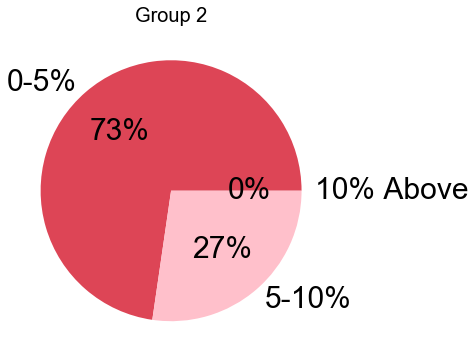

In [34]:
from matplotlib.font_manager import FontProperties
font_path=r'C:\Users\sherr\Tools' #笔记本
font_1=FontProperties(fname=font_path+'\\'+'Arial.ttf',size=30)
plt.rcParams['font.sans-serif']=['Arial']
fig,ax=plt.subplots(figsize=[10,6])
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data\pic')
plt.pie([0.727,1-0.727,0],
       labels=['0-5%','5-10%','10% Above'],autopct='%1.0f%%',colors=['#DD4556','pink','blue'],
       textprops={'fontproperties':font_1,'color':'black'})
plt.savefig('group_1.png',transparent=True,bbox_inches='tight')
plt.title('Group 2',fontsize=20)
plt.show()

In [ ]:
from matplotlib.font_manager import FontProperties
font_path=r'C:\Users\sherr\Tools' #笔记本
font_1=FontProperties(fname=font_path+'\\'+'Arial.ttf',size=30)
plt.rcParams['font.sans-serif']=['Arial']
fig,ax=plt.subplots(figsize=[10,6])
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data\pic')
plt.pie([0.8552,0.9342-0.8552,1-0.9342],
       labels=['0-5%','5-10%','10% Above'],autopct='%1.0f%%',colors=['#7470BF','#9b95ff','lightblue'],
       textprops={'fontproperties':font_1,'color':'black'})
plt.savefig('group_5.png',transparent=True,bbox_inches='tight')
plt.show()